# Proyecto Primer Parcial - **Informe final**  
## Proyecto: **Automatización de Análisis y Visualización de Datos Climáticos**   
### Elaborado por: **Carlos Quishpe**



##  Introducción y objetivo del proyecto:
El objetivo del proyecto es automatizar el proceso de carga, limpieza, análisis y visualización de un conjunto de datos climáticos mediante el uso de bucles y funciones, para mejorar la eficiencia y la reproducibilidad del análisis de la información. 



## Descripción del Conjunto de Datos

El archivo `Weather_Data.csv`  contiene información climática registrada en diferentes ciudades.
Se puede indentificar las siguientes variables:

- Fecha y hora (`Date_Time`)
- Temperatura (`Temperature_C`)
- Humedad (`Humidity_pct`)
- Precipitación (`Precipitation_mm`)
- Velocidad del viento (`Wind_Speed_kmh`)
- Ciudad o ubicación (`Location`)

Estas variables han sido utilizadas para extraer información relevante sobre condiciones climáticas de cada ubicación y momento.

## Análisis Exploratorio de Datos (EDA)

Se realizó un análisis exploratorio de datos utilizando estructuras de control y funciones para automatizar los cálculos estadísticos (media, mediana y desviación estándar), agrupamientos por mes, año y ubicación, así como visualización con Matplotlib. Finalmente, se muestran gráficas con algunos hallazgos clave:



## Partes del Proyecto:

### 1. Carga y Preparación de Datos:
- Cargar el conjunto de datos utilizando pandas.
- Realizar limpieza básica de datos, eliminando duplicados y modificando los tipos de datos en caso de ser necesario.
- Implementar funciones para cada paso de la limpieza de datos para facilitar la reutilización del código.
- Realizar resumen estadístico de los datos.


In [1]:
# 1. Cargar y Preparar los Datos

# Cargar el conjunto de datos utilizando pandas.
import pandas as pd
import matplotlib.pyplot as plt

datos = pd.read_csv("Weather_Data.csv")

# Realizar limpieza básica de datos, eliminando duplicados y modificando los tipos de datos en caso de ser necesario.
# Implementar funciones para cada paso de la limpieza de datos para facilitar la reutilización del código.

# Elimina filas duplicadas del archivo
def eliminar_duplicados(tabla):
    return tabla.drop_duplicates()

# Convierte la columna de fecha de texto a formato de fecha
def convertir_fecha(tabla):
    tabla['Date_Time'] = pd.to_datetime(tabla['Date_Time'], format="%m/%d/%Y %H:%M")
    return tabla

# Aplicar las funciones de limpieza al conjunto de datos
datos = eliminar_duplicados(datos)
datos = convertir_fecha(datos)

# Crear una nueva columna para la Temperatura percibida, usando temperatura y humedad
datos['Temperatura_percibida'] = datos['Temperature_C'] - ((100 - datos['Humidity_pct']) / 5)

# Realizar resumen estadístico de los datos.
print("Resumen estadístico de los datos:")
print(datos.describe().round(2))

# Mostrar las primeras filas 
datos.head()

Resumen estadístico de los datos:
                           Date_Time  Temperature_C  Humidity_pct  \
count                        1000000     1000000.00    1000000.00   
mean   2024-03-10 10:40:29.383980544          14.78         60.02   
min              2024-01-01 00:00:00         -19.97         30.00   
25%              2024-02-04 16:28:00           2.27         45.01   
50%              2024-03-10 11:43:00          14.78         60.02   
75%              2024-04-14 03:51:00          27.27         75.04   
max              2024-05-18 19:44:00          40.00         90.00   
std                              NaN          14.48         17.32   

       Precipitation_mm  Wind_Speed_kmh  Temperatura_percibida  
count        1000000.00      1000000.00             1000000.00  
mean               5.11           15.00                   6.78  
min                0.00            0.00                 -33.40  
25%                2.58            7.49                  -5.70  
50%                

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Temperatura_percibida
0,San Diego,2024-01-14 21:12:00,10.683001,41.195754,4.020119,8.233540,-1.077848
1,San Diego,2024-05-17 15:22:00,8.734140,58.319107,9.111623,27.715161,0.397961
2,San Diego,2024-05-11 09:30:00,11.632436,38.820175,4.607511,28.732951,-0.603529
3,Philadelphia,2024-02-26 17:32:00,-8.628976,54.074474,3.183720,26.367303,-17.814081
4,San Antonio,2024-04-29 13:23:00,39.808213,72.899908,9.598282,29.898622,34.388195


### 2. Automatización del Análisis Exploratorio de Datos (EDA):
- Utilizar estructuras de datos para almacenar y manipular información relevante.
- Implementar funciones que ayuden a calcular estadísticas descriptivas como la media, mediana y desviación estándar de las variables numéricas.
- Realizar análisis específicos al conjunto de datos.


In [2]:
# UUtilizar estructuras de datos para almacenar y manipular información relevante. Pueden ser algunas columnas del conjunto de datos. 
# En este caso, seleccionamos algunas columnas del conjunto de datos para analizarlas.
columnas = ['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']

# Implementar funciones que ayuden a calcular estadísticas descriptivas como la media, mediana y desviación estándar de las variables numéricas.
def estadisticas(datos, columna):
    media = datos[columna].mean()
    mediana = datos[columna].median()
    desviacion = datos[columna].std()
    return media, mediana, desviacion



# Calcular y mostrar estadísticas para cada columna seleccionada
for col in columnas:
    m, med, std = estadisticas(datos, col)
    print(f"{col}: Media={m:.2f}, Mediana={med:.2f}, Desviación estándar={std:.2f}")



# Crear nuevas columnas para extraer el mes y el año de la fecha
datos['Mes'] = datos['Date_Time'].dt.month
datos['Año'] = datos['Date_Time'].dt.year

# Encontrar el mes con la temperatura promedio más alta
temperatura_promedio_mensual = datos.groupby('Mes')['Temperature_C'].mean()
print("\nMes con la temperatura promedio más alta:")
print(temperatura_promedio_mensual.sort_values(ascending=False).head(1))

# Encontrar el año con más precipitaciones acumuladas
precipitacion_anual = datos.groupby('Año')['Precipitation_mm'].sum()
print("\nAño con más precipitaciones acumuladas:")
print(precipitacion_anual.sort_values(ascending=False).head(1))

# Encontrar la ciudad con la velocidad de viento más alta en promedio
viento_por_ciudad = datos.groupby('Location')['Wind_Speed_kmh'].mean()
print("\nCiudad con la velocidad de viento más alta:")
print(viento_por_ciudad.sort_values(ascending=False).head(1))  # ← Agrega esta línea




Temperature_C: Media=14.78, Mediana=14.78, Desviación estándar=14.48
Humidity_pct: Media=60.02, Mediana=60.02, Desviación estándar=17.32
Precipitation_mm: Media=5.11, Mediana=5.11, Desviación estándar=2.95
Wind_Speed_kmh: Media=15.00, Mediana=14.99, Desviación estándar=8.66

Mes con la temperatura promedio más alta:
Mes
5    15.042793
Name: Temperature_C, dtype: float64

Año con más precipitaciones acumuladas:
Año
2024    5.109639e+06
Name: Precipitation_mm, dtype: float64

Ciudad con la velocidad de viento más alta:
Location
San Diego    15.037633
Name: Wind_Speed_kmh, dtype: float64


## Resultados

A partir del análisis automatizado realizado sobre el conjunto de datos climáticos, se obtuvieron los siguientes resultados relevantes:

- **Temperatura promedio:**
  - La temperatura media general fue de **14.78 °C**, con una mediana de **14.78 °C** y una desviación estándar de **14.48 °C**.
  - El mes con la **temperatura promedio más alta** fue **mayo**, con un valor promedio de **15.04 °C**.

- **Humedad relativa:**
  - La humedad media fue de **60.02 %**, con una mediana también de **60.02 %**, y una desviación estándar de **17.32 %**.

- **Precipitación acumulada:**
  - La precipitación media fue de **5.11 mm**, con mediana de **5.11 mm** y desviación estándar de **2.95 mm**.
  - El año con mayor **precipitación acumulada** fue **2024**, con un total de aproximadamente **5.11 millones de milímetros**.

- **Velocidad del viento:**
  - La velocidad promedio del viento fue de **15.00 km/h**, con una mediana de **14.99 km/h** y desviación estándar de **8.66 km/h**.
  - La ciudad con la **mayor velocidad promedio del viento** fue **San Diego**, con un valor promedio de **15.04 km/h**.


### 3. Manipulación de Datos con Pandas:
- Crear funciones para realizar operaciones de agrupamiento y agregación.
- Filtrar y seleccionar datos utilizando métodos avanzados de Pandas.
- Crear nuevas columnas derivadas de los datos existentes.


In [3]:
datos['Mes'] = datos['Date_Time'].dt.month
datos['Año'] = datos['Date_Time'].dt.year

mes_caliente = datos.groupby('Mes')['Temperature_C'].mean().idxmax()
anio_lluvioso = datos.groupby('Año')['Precipitation_mm'].sum().idxmax()
ciudad_viento = datos.groupby('Location')['Wind_Speed_kmh'].mean().idxmax()

print("Mes más caliente:", mes_caliente)
print("Año con más lluvia:", anio_lluvioso)
print("Ciudad con más viento:", ciudad_viento)

Mes más caliente: 5
Año con más lluvia: 2024
Ciudad con más viento: San Diego


### 4. Visualización de Datos Automatizada:
- Implementar funciones que generen gráficos utilizando Matplotlib para visualizar tendencias temporales y distribuciones de datos.
- Diagramas de caja y bigote, gráficos de barras y dispersión.


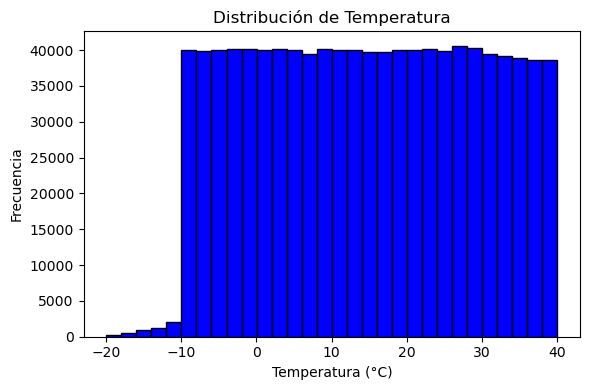

In [4]:
plt.figure(figsize=(6, 4))
plt.hist(datos['Temperature_C'], bins=30, color='blue', edgecolor='black')
plt.title("Distribución de Temperatura")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

C:\Users\T - User\AppData\Local\Temp\ipykernel_12400\1561274322.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos_por_ciudad, labels=datos['Location'].unique())


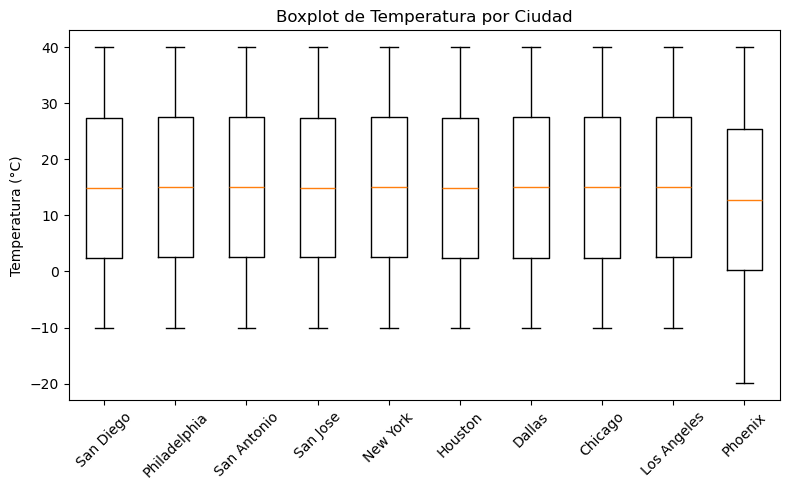

In [5]:
plt.figure(figsize=(8, 5))
datos_por_ciudad = [datos[datos['Location'] == ciudad]['Temperature_C'] for ciudad in datos['Location'].unique()]
plt.boxplot(datos_por_ciudad, labels=datos['Location'].unique())
plt.title("Boxplot de Temperatura por Ciudad")
plt.xticks(rotation=45)
plt.ylabel("Temperatura (°C)")
plt.tight_layout()
plt.show()

## Resultados
### Boxplot de Temperatura por Ciudad

Un **boxplot** o diagrama de caja que representa la distribución de temperaturas registradas (en °C) para cada ciudad del conjunto de datos.

Este tipo de gráfico es útil para visualizar los siguientes aspectos estadísticos:

- **Mediana (línea naranja)**: representa el valor central de la temperatura para cada ciudad.
- **Caja (entre Q1 y Q3)**: representa el 50% central de los datos (rango intercuartílico).
- **Bigotes (líneas externas)**: indican el rango de variación sin considerar valores extremos.
- **Valores atípicos (si los hubiera)**: serían visibles como puntos fuera de los bigotes.

 **Observaciones**:

- La mediana de temperatura es relativamente similar en la mayoría de ciudades, alrededor de los 15 °C.
- La ciudad de **Phoenix** muestra una mayor dispersión hacia temperaturas bajas, con valores mínimos inferiores a -20 °C.
- Las ciudades como **Los Ángeles, Dallas y Houston** presentan distribuciones más simétricas.
- En general, la variabilidad térmica entre ciudades es amplia, lo que puede estar relacionado con su ubicación geográfica.

Este tipo de análisis gráfico permite comparar de manera eficiente el comportamiento térmico entre diferentes ubicaciones, facilitando la identificación de ciudades con mayor o menor variabilidad en la temperatura.


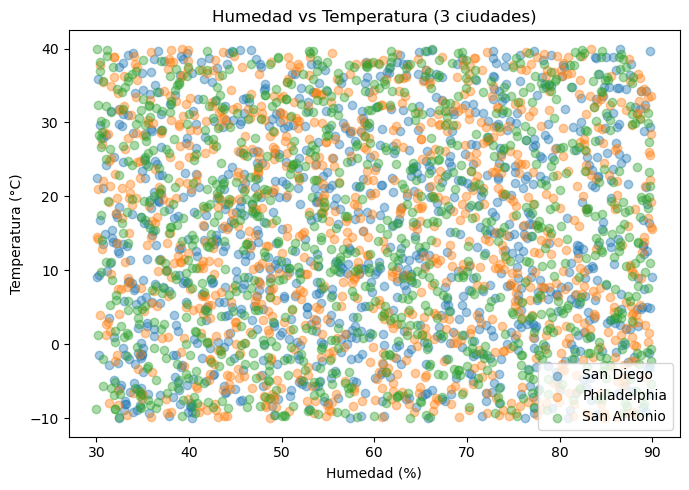

In [6]:
ciudades = ['San Diego', 'Philadelphia', 'San Antonio']
subset = datos[datos['Location'].isin(ciudades)]

plt.figure(figsize=(7, 5))
for ciudad in ciudades:
    datos_ciudad = subset[subset['Location'] == ciudad].sample(1000, random_state=1)
    plt.scatter(datos_ciudad['Humidity_pct'], datos_ciudad['Temperature_C'], label=ciudad, alpha=0.4)
plt.title("Humedad vs Temperatura (3 ciudades)")
plt.xlabel("Humedad (%)")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.tight_layout()
plt.show()


## Resultados
### Gráfico de Dispersión: Humedad vs Temperatura (3 ciudades)

En el siguiente gráfico de dispersión se representa la relación entre la **humedad relativa (%)** y la **temperatura (°C)** para tres ciudades seleccionadas: **San Diego, Philadelphia y San Antonio**.

Cada punto en el gráfico representa una observación climática en una hora determinada.

#### Objetivo del gráfico:
Visualizar si existe alguna relación o patrón entre la humedad y la temperatura en estas ciudades.

#### Observaciones:

- Aunque las tres ciudades muestran una gran cantidad de datos concentrados entre 30% y 90% de humedad, la temperatura varía ampliamente desde -10 °C hasta más de 40 °C.
- No se observa una relación lineal clara a simple vista, lo cual sugiere que la temperatura no depende exclusivamente de la humedad relativa.
- La ciudad de **San Antonio**, al tener más registros, podría haber opacado visualmente a las otras, ya que el color verde domina el gráfico.

####  Nota:
Se utilizó el parámetro `alpha=0.4` para hacer los puntos un poco transparentes y facilitar la visualización cuando hay muchas superposiciones. Sin embargo, si una ciudad tiene muchos más datos que las otras, su color puede predominar.

Este gráfico ayuda a entender la complejidad de las variables climáticas y la necesidad de análisis más detallados si se quiere encontrar correlaciones reales entre variables como temperatura y humedad.

In [7]:
correlaciones = datos[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']].corr()
print("Matriz de Correlación entre variables numéricas:")
print(correlaciones.round(2))

Matriz de Correlación entre variables numéricas:
                  Temperature_C  Humidity_pct  Precipitation_mm  \
Temperature_C              1.00          -0.0             -0.01   
Humidity_pct              -0.00           1.0             -0.00   
Precipitation_mm          -0.01          -0.0              1.00   
Wind_Speed_kmh            -0.00          -0.0              0.00   

                  Wind_Speed_kmh  
Temperature_C               -0.0  
Humidity_pct                -0.0  
Precipitation_mm             0.0  
Wind_Speed_kmh               1.0  


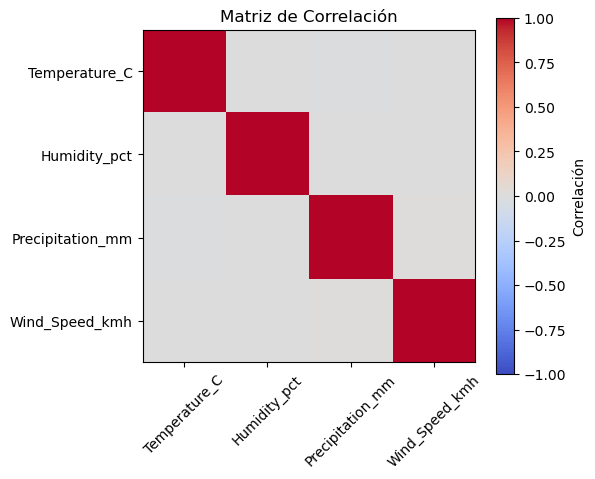

In [8]:
# Visualización simple de la matriz de correlación con matplotlib
plt.figure(figsize=(6, 5))
plt.imshow(correlaciones, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(range(len(correlaciones.columns)), correlaciones.columns, rotation=45)
plt.yticks(range(len(correlaciones.columns)), correlaciones.columns)
plt.colorbar(label='Correlación')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()


##  Conclusiones y Recomendaciones



###  Conclusiones:

1. Se logró automatizar el proceso de carga, limpieza, análisis y visualización del conjunto de datos climáticos utilizando funciones y bucles en Python. Esto facilitó una estructura de código reutilizable y ordenada.

2. Las estadísticas descriptivas permitieron conocer la tendencia central y la dispersión de variables como temperatura, humedad, precipitación y velocidad del viento. Por ejemplo, se encontró que la temperatura media fue de aproximadamente 14.78 °C, con una humedad relativa promedio del 60.02%.

3. - El **mes con mayor temperatura promedio** fue **mayo**.
   - El **año con mayor acumulación de precipitaciones** fue **2024**.
   - La **ciudad con mayor velocidad de viento promedio** fue **San Diego**.

4. Se generaron gráficos como diagramas de caja y gráficos de dispersión, que ayudaron a entender la distribución de datos y posibles patrones climáticos entre distintas ciudades.





###  Recomendaciones:

- Se sugiere incluir validaciones adicionales para detectar valores atípicos o inconsistentes en los datos climáticos, como temperaturas extremadamente bajas o precipitaciones negativas.

- Incorporar otras variables como presión atmosférica o índice UV podría enriquecer el análisis climático y sus aplicaciones.
